<a href="https://colab.research.google.com/github/Rachael-Osoro/Phase_2_project/blob/main/kc_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lots** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [18]:
#load the kings county dataset for exploration
pd.set_option('max_columns', 999)
kc = pd.read_csv(r"/content/drive/MyDrive/PHASE_2_PROJECT/kc_house_data.csv")
kc

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         NaN   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [19]:
# waterfront, view and year renovated columns contain null values, let's inspect the columns


# the waterfront column shows whether house has waterfront view or not
# replace null values with zero to represent abscence of waterfront view
kc["waterfront"].fillna(0, inplace=True)
kc.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [20]:
# in the view column, replace nan with zero to show that the house was not viewed
kc["view"].fillna(0, inplace=True)
kc.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [21]:
# replce nan with zero, to show that house was not renovated
kc['yr_renovated'].fillna(0, inplace=True)
kc.yr_renovated.value_counts()

0.0       20853
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [22]:
# replace the ? in sqft_basement column with 0

kc['sqft_basement'] = kc['sqft_basement'].replace('?', 0)
kc['sqft_basement'] = pd.to_numeric(kc['sqft_basement']) # convert to numeric datatype

#check the column
kc['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [23]:
# dataset does not have duplicated records
kc.duplicated().sum()

0

In [24]:
# cleaned dataset summary
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [25]:
kc.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.006760      0.233181      3.409825   
std    4.141264e+04      0.539683      0.081944      0.764673      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     285.716581   1970.999676     68.758207   
std        1.173200    827.759761     439.819830     29.375234    364.037499   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [26]:
kc.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.003599  0.264306 -0.002127   0.063629     0.104637  0.021459   
view           0.011772  0.393497  0.078354   0.186016     0.281715  0.075054   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
sqft_basement -0.004359  0.321108  0.297229   0.278485     0.428660  0.015031   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.010612  0.117855  0.017900   0.047177     0.051060  0.004979   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  waterfront      view  condition     grade  \
id             0.018608   -0.003599  0.011772  -0.023803  0.008188   
price          0.256804    0.264306  0.393497   0.036056  0.667951   
bedrooms       0.177944   -0.002127  0.078354   0.026496  0.356563   
bathrooms      0.502582    0.063629  0.186016  -0.126479  0.665838   
sqft_living    0.353953    0.104637  0.281715  -0.059445  0.762779   
sqft_lot      -0.004814    0.021459  0.075054  -0.008830  0.114731   
floors         1.000000    0.020797  0.028414  -0.264075  0.458794   
waterfront     0.020797    1.000000  0.380543   0.016648  0.082818   
view           0.028414    0.380543  1.000000   0.045622  0.249082   
condition     -0.264075    0.016648  0.045622   1.000000 -0.146896   
grade          0.458794    0.082818  0.249082  -0.146896  1.000000   
sqft_above     0.523989    0.071778  0.166017  -0.158904  0.756073   
sqft_basement -0.241866    0.083050  0.270629   0.168482  0.165843   
yr_built       0.489193   -0.024487 -0.054452  -0.361592  0.447865   
yr_renovated   0.003793    0.073939  0.090339  -0.055808  0.015623   
zipcode       -0.059541    0.028923  0.085059   0.002888 -0.185771   
lat            0.049239   -0.012157  0.006321  -0.015102  0.113575   
long           0.125943   -0.037628 -0.077702  -0.105877  0.200341   
sqft_living15  0.280102    0.083823  0.278928  -0.093072  0.713867   
sqft_lot15    -0.010722    0.030658  0.073083  -0.003126  0.120981   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010799      -0.004359  0.021617     -0.010612 -0.008211   
price            0.605368       0.321108  0.053953      0.117855 -0.053402   
bedrooms         0.479386       0.297229  0.155670      0.017900 -0.154092   
bathrooms        0.686668       0.278485  0.507173      0.047177 -0.204786   
sqft_living      0.876448       0.428660  0.318152      0.051060 -0.199802   
sqft_lot         0.184139       0.015031  0.052946      0.004979 -0.129586   
floors           0.523989      -0.241866  0.489193      0.003793 -0.059541   
waterfront       0.071778       0.083050 -0.024487      0.073939  0.028923   
view             0.166017       0.270629 -0.054452      0.090339  0.085059   
condition       -0.158904       0.168482 -0.361592     -0.055808  0.

In [27]:
# drop columns that are not significant in predicting our prices
unneccessary = kc[["id"]]
data = kc.drop(unneccessary, axis=1)
data.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         0.0   0.0          3      7        1180            0.0      1955   
1         0.0   0.0          3      7        2170          400.0      1951   
2         0.0   0.0          3      6         770            0.0      1933   
3         0.0   0.0          5      7        1050          910.0      1965   
4         0.0   0.0          3      8        1680            0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           0.0    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

# **Converting variables into the right data types**

In [28]:
#convert date into datetime datatype

data["date"] = pd.to_datetime(data["date"])

#split date into two columns: year sold and month sold

data['yr_sold'] = data.date.dt.year
data['month_sold']=data.date.dt.month
data.drop('date', axis=1, inplace=True)

data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         0.0   
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7        1180            0.0      1955           0.0   
1   0.0          3      7        2170          400.0      1951        1991.0   
2   0.0          3      6         770            0.0      1933           0.0   
3   0.0          5      7        1050          910.0      1965           0.0   
4   0.0          3      8        1680            0.0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  yr_sold  month_sold  
0    98178  47.5112 -122.257           1340        5650     2014          10  
1    98125  47.7210 -122.319           1690        7639     2014          12  
2    98028  47.7379 -122.233           2720        8062     2015           2  
3    98136  47.5208 -122.393           1360        5000     2014          12  
4    98074  47.6168 -122.045           1800        7503     2015           2

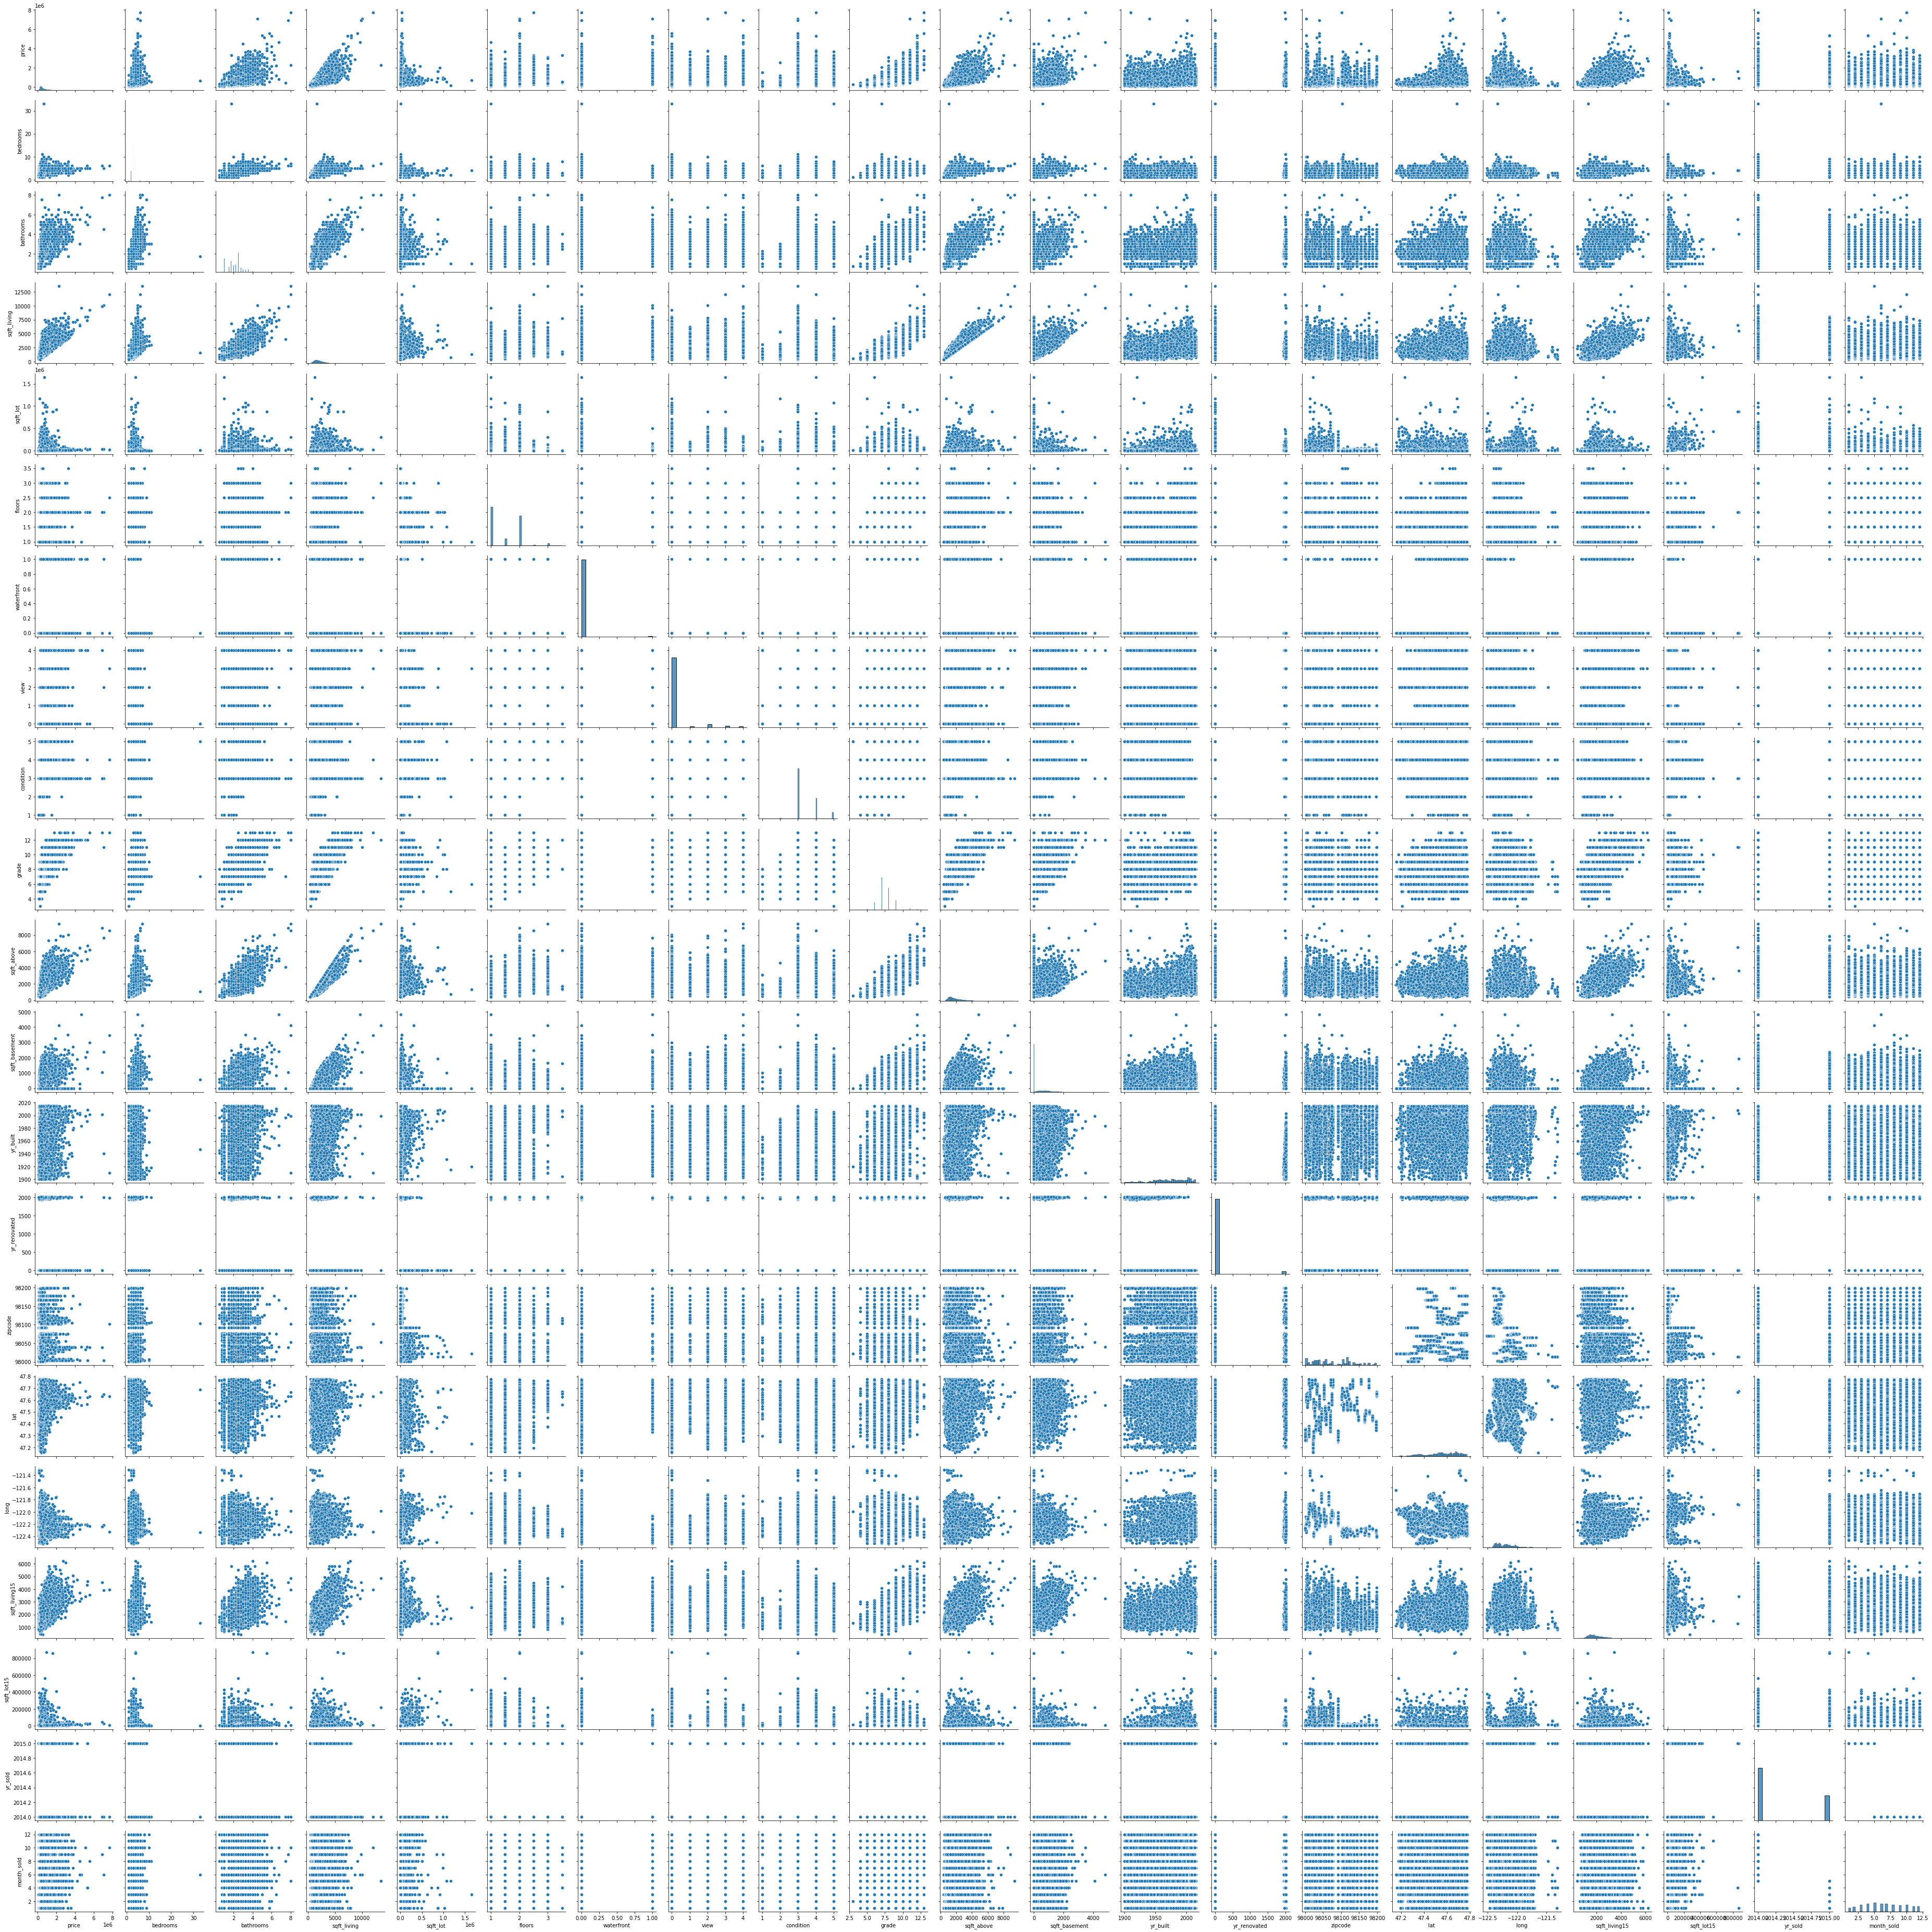

In [20]:
sns.pairplot(data)

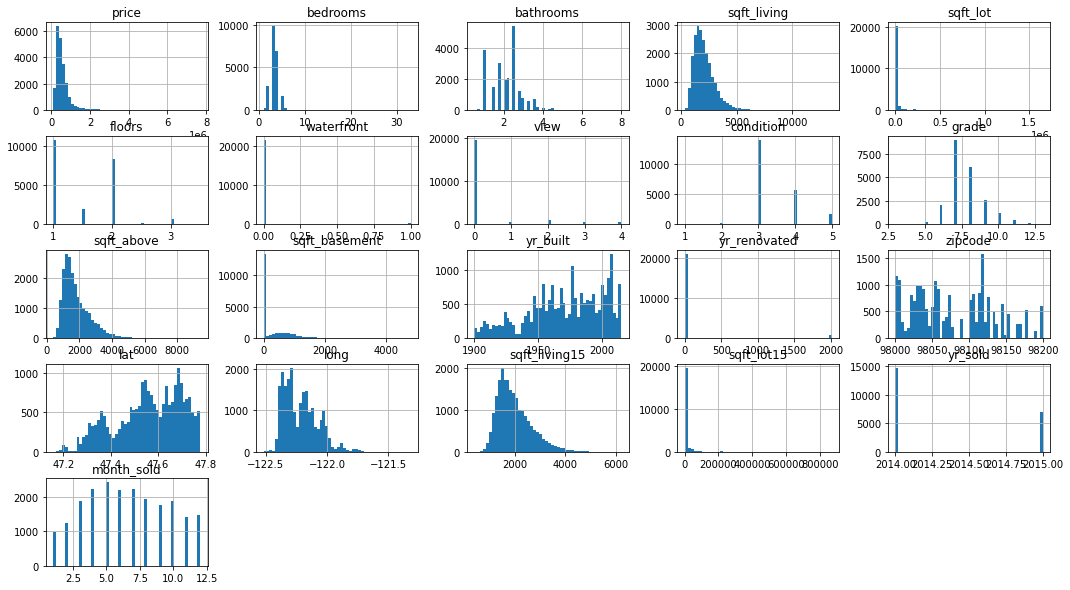

In [21]:
# plot histogram to check for distribution of variables
data.hist(bins=50, figsize=(18,10));

price, sqft_living, sqft_above, and sqft_living15 seem to have a normal distribution

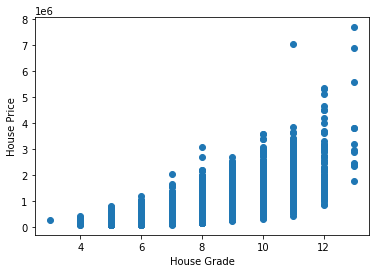

<Figure size 432x288 with 0 Axes>

In [106]:
#price has a positive correlation with grade
plt.scatter(kc.grade, kc.price)
plt.xlabel('House Grade')
plt.ylabel('House Price')
fig = plt.figure()

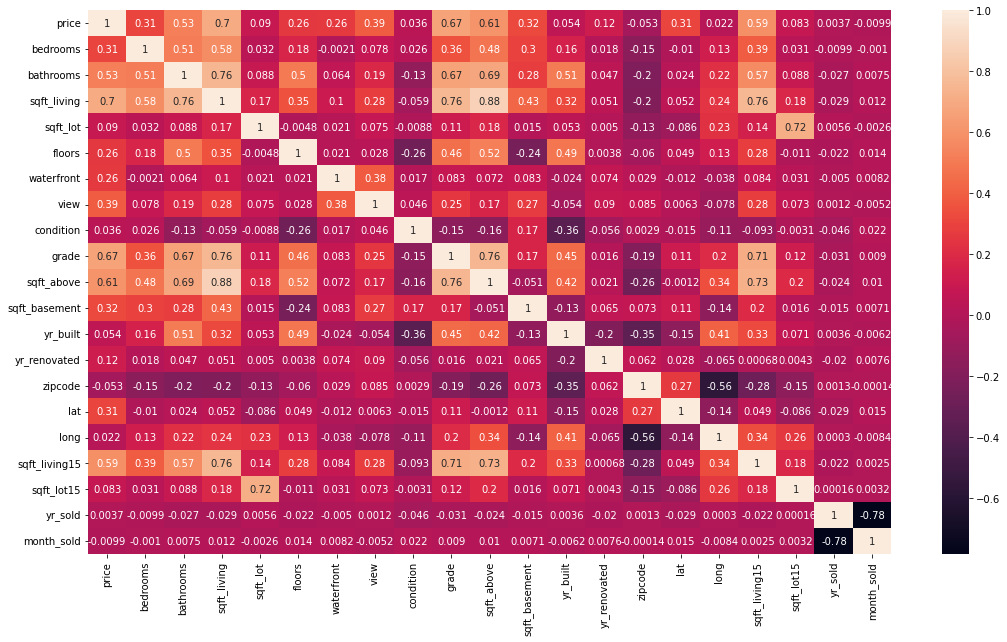

In [22]:
fig, ax = plt.subplots(figsize=(18,10))
ax=sns.heatmap(data.corr(), annot=True)

Top five independent variables with high correlation with our target, ```price```, include.

```sqft_living``` 0.7

```grade``` 0.67

```sqft_above``` 0.61

```sqft_living15``` 0.59 

```bathrooms``` 0.53

This will be paramount in modelling


**Dealing with outliers**

Remove outliers from the bedroom column.

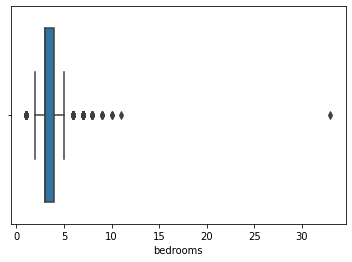

In [29]:
#plot boxplot to identify of outliers
ax=sns.boxplot(x=data['bedrooms'])

In [15]:
#drop row with more than 10  bedroms
data = data.drop(data.loc[data['bedrooms'] >10].index, axis=0)
data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64

In [25]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold', 'month_sold'],
      dtype='object')

In [16]:
cat_data = data[['yr_sold', 'month_sold', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']]
num_data = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
display('Categorical Data:', cat_data, 'Numerical Data:', num_data)

'Categorical Data:'

yr_sold  month_sold  waterfront  view  condition  grade  yr_built  \
0         2014          10         0.0   0.0          3      7      1955   
1         2014          12         0.0   0.0          3      7      1951   
2         2015           2         0.0   0.0          3      6      1933   
3         2014          12         0.0   0.0          5      7      1965   
4         2015           2         0.0   0.0          3      8      1987   
...        ...         ...         ...   ...        ...    ...       ...   
21592     2014           5         0.0   0.0          3      8      2009   
21593     2015           2         0.0   0.0          3      8      2014   
21594     2014           6         0.0   0.0          3      7      2009   
21595     2015           1         0.0   0.0          3      8      2004   
21596     2014          10         0.0   0.0          3      7      2008   

       yr_renovated  zipcode  
0               0.0    98178  
1            1991.0    98125  
2               0.0    98028  
3               0.0    98136  
4               0.0    98074  
...             ...      ...  
21592           0.0    98103  
21593           0.0    98146  
21594           0.0    98144  
21595           0.0    98027  
21596           0.0    98144  

[21595 rows x 9 columns]

'Numerical Data:'

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       sqft_above  sqft_basement      lat     long  sqft_living15  sqft_lot15  
0            1180            0.0  47.5112 -122.257           1340        5650  
1            2170          400.0  47.7210 -122.319           1690        7639  
2             770            0.0  47.7379 -122.233           2720        8062  
3            1050          910.0  47.5208 -122.393           1360        5000  
4            1680            0.0  47.6168 -122.045           1800        7503  
...           ...            ...      ...      ...            ...         ...  
21592        1530            0.0  47.6993 -122.346           1530        1509  
21593        2310            0.0  47.5107 -122.362           1830        7200  
21594        1020            0.0  47.5944 -122.299           1020        2007  
21595        1600            0.0  47.5345 -122.069           1410        1287  
21596        1020            0.0  47.5941 -122.299           1020        1357  

[21595 rows x 12 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


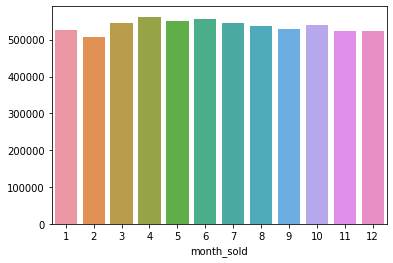

In [17]:
x=data.groupby(by= 'month_sold').count().index
y= data.groupby(by='month_sold').price.agg('mean').values
ax = sns.barplot(x,y);



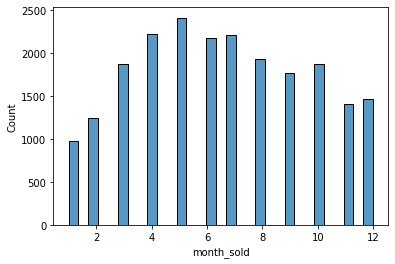

In [ ]:
#houses sold per month
sns.histplot(data.month_sold); 


#  Multicolinearity 
When independent variables are highly correlated, it makes it hard to interpret a model and creates overfitting.
An unstable model does the following: 

1.) **Difficult to choose significant variables**

2.) **Unstable coefficient estimates**, making it hard to interpret the model.

3.) **Overfitting**.

This section will be checking for multicollinearity and dealing with variables that are highly correlated. i.e **correlation of greater than or equal to 0.8.**


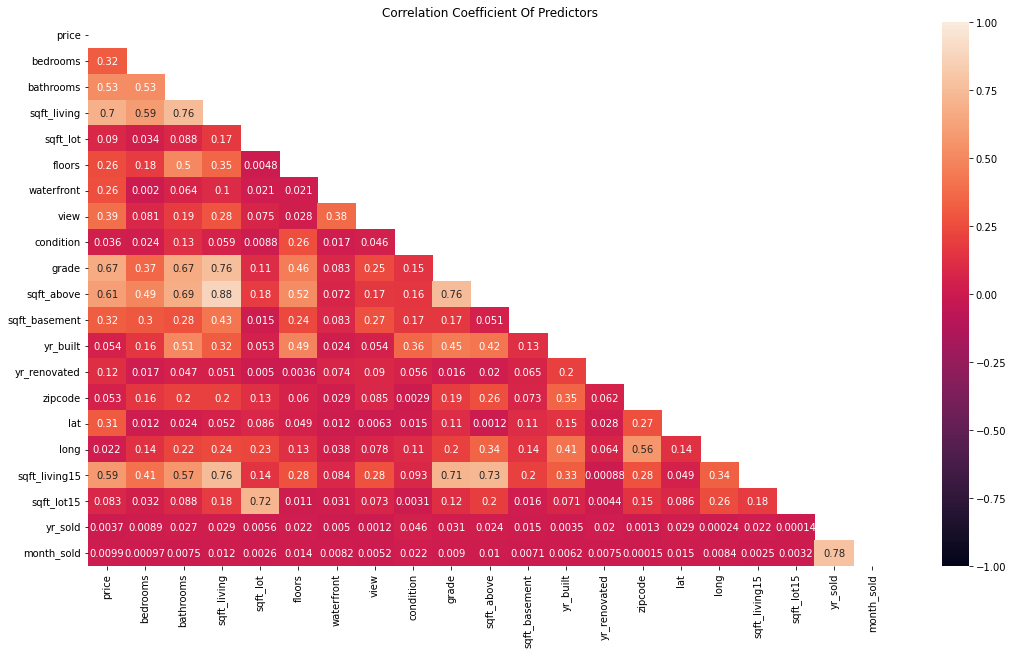

In [18]:
plt.figure(figsize=(18,10))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data.corr().abs(), dtype=bool))

# generate heatmap
sns.heatmap(data.corr().abs(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()


  Top Correlated Independent variables include:
  sqft_above and sqft_living 0.88
  grade and sqft_living 0.76
  bathrooms and sqft_living o.76
  sqft_living15 and sqft_living 0.76


(sqft_living, sqft_above)	0.876446
(month_sold, yr_sold)	0.782338
(grade, sqft_living)	0.762825
(sqft_living15, sqft_living)	0.756468
(grade, sqft_above)	0.756103
(sqft_living, bathrooms)	0.755742


  Drop sqft_above, sqft_living15, bathrooms


In [29]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [17]:
df[(df.cc>.75) & (df.cc <1)]

cc
pairs                                 
(sqft_living, sqft_above)     0.876446
(month_sold, yr_sold)         0.782338
(grade, sqft_living)          0.762825
(sqft_living15, sqft_living)  0.756468
(grade, sqft_above)           0.756103
(sqft_living, bathrooms)      0.755742

#Simple linear regression
Plot a simple linear regression with price and sqft_living which is the most correlated predictor of price

In [ ]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())


y = data["price"]
X = data.drop("sqft_living15", "year_sold", "grade" )

Simple Linear regression

In [115]:
#model price with it's highly correlated predictor, sqft_living
#import stats model

from statsmodels.formula.api import ols

#model data

formula = 'price ~ sqft_living'
model = ols(formula, data).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:45:37   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared of 0.493 is low.

For every increase of house coverage by 1 square feet, house price increases by $ 280.88

In [116]:
#create a model with the top five correlated features

formula1 = 'price~ sqft_living+grade+sqft_above+sqft_living15+bathrooms'
model1 = ols(formula1, data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5161.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:45:41   Log-Likelihood:            -2.9890e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -6.52e+05   1.36e+04    -48.079      0.000   -6.79e+05   -6.25e+05
sqft_living     245.5631      4.528     54.238      0.000     236.689     254.437
grade          1.119e+05   2470.776     45.293      0.000    1.07e+05    1.17e+05
sqft_above      -80.6961      4.458    -18.101      0.000     -89.434     -71.958
sqft_living15    22.2598      4.032      5.520      0.000      14.356      30.164
bathrooms     -3.567e+04   3440.363    -10.369      0.000   -4.24e+04   -2.89e+04
==============================================================================
Omnibus:                    17251.912   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128620.760
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      37.771   Cond. No.                     2.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SElect Significant features

the multiple regression model performs better compared to the simple regression model.
However, multicollinearity of features affects model performance. Therefore, drop columns that are highly correlated to other predictors.
In this case, bathrooms and sqft_above will be dropped.


In [117]:
# drop highly correlated predictors
data2 = data.drop(['sqft_above', 'bathrooms', 'yr_sold'], axis=1)
data2.head()

price  bedrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0  221900.0         3         1180      5650     1.0         0.0   0.0   
1  538000.0         3         2570      7242     2.0         0.0   0.0   
2  180000.0         2          770     10000     1.0         0.0   0.0   
3  604000.0         4         1960      5000     1.0         0.0   0.0   
4  510000.0         3         1680      8080     1.0         0.0   0.0   

   condition  grade  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0          3      7            0.0      1955           0.0    98178  47.5112   
1          3      7          400.0      1951        1991.0    98125  47.7210   
2          3      6            0.0      1933           0.0    98028  47.7379   
3          5      7          910.0      1965           0.0    98136  47.5208   
4          3      8            0.0      1987           0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15  month_sold  
0 -122.257           1340        5650          10  
1 -122.319           1690        7639          12  
2 -122.233           2720        8062           2  
3 -122.393           1360        5000          12  
4 -122.045           1800        7503           2

In [118]:
#Modelling with top three features
formula2 = 'price ~ sqft_living+grade+sqft_living15'
model2 = ols(formula2, data2).fit()


model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     8282.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:45:55   Log-Likelihood:            -2.9912e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21593   BIC:                         5.983e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.988e+05   1.34e+04    -44.751      0.000   -6.25e+05   -5.73e+05
sqft_living     178.3426      3.249     54.892      0.000     171.974     184.711
grade          9.633e+04   2374.911     40.561      0.000    9.17e+04    1.01e+05
sqft_living15    15.2814      4.020      3.802      0.000       7.402      23.161
==============================================================================
Omnibus:                    17073.030   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1043757.328
Skew:                           3.328   Prob(JB):                         0.00
Kurtosis:                      36.400   Cond. No.                     2.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a slight decrease in r squared from 0.544 to 0.535

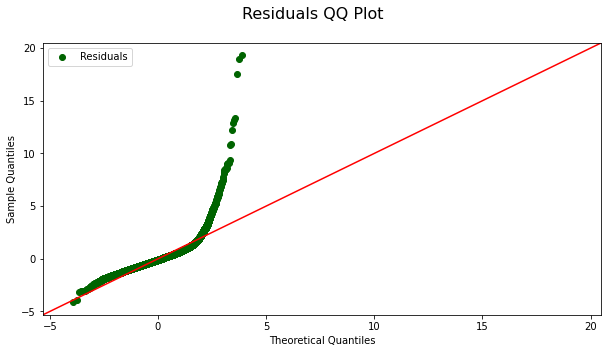

In [119]:
import scipy.stats as stats
import statsmodels.api as sm
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, color="darkgreen", label="Residuals", line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16,)
fig.set_size_inches(10, 5)
plt.legend()
fig.show()

Normality assumption is violated as the best line of fit fails to accommodate most values. Log transformation will be done to improve normality assumption

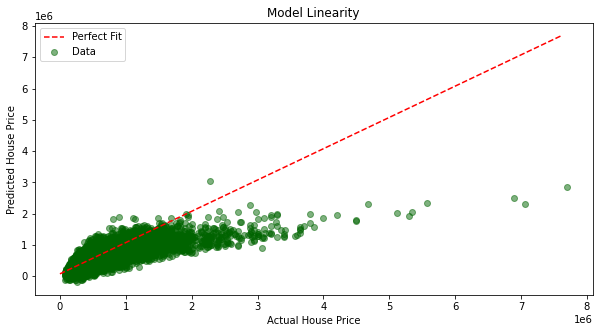

In [122]:
preds = model2.predict(data2)
fig, ax = plt.subplots(figsize=(10,5))

perfect_line = np.arange(data2.price.min(), data2.price.max())
ax.plot(perfect_line, linestyle="--", color="red", label="Perfect Fit")
ax.scatter(data2.price, preds, color="darkgreen", label="Data", alpha=0.5)
ax.set_title("Model Linearity")
ax.set_xlabel("Actual House Price")
ax.set_ylabel("Predicted House Price")
ax.legend();

Linearity is not satisfied by this model

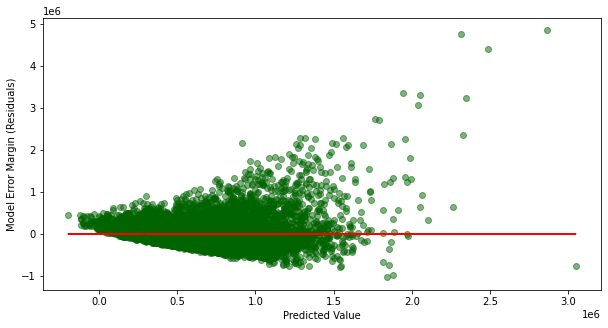

In [56]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(preds, residuals, color="darkgreen", alpha=0.5)
ax.plot(preds, [0 for length in range(len(data2))], color="red")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Model Error Margin (Residuals)");

 A lot of funneling happening, hence homoscedasticity is not satisfied by this model.

In [74]:
formul = 'price ~ sqft_living+grade+view'
mode = ols(formul, data).fit()


mode.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     9618.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        08:02:46   Log-Likelihood:            -2.9823e+05
No. Observations:               21597   AIC:                         5.965e+05
Df Residuals:                   21593   BIC:                         5.965e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.491e+05   1.29e+04    -42.707      0.000   -5.74e+05   -5.24e+05
sqft_living   166.4394      2.785     59.762      0.000     160.981     171.898
grade        9.409e+04   2159.252     43.576      0.000    8.99e+04    9.83e+04
view         9.679e+04   2232.704     43.352      0.000    9.24e+04    1.01e+05
==============================================================================
Omnibus:                    16676.477   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1096517.098
Skew:                           3.177   Prob(JB):                         0.00
Kurtosis:                      37.324   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
data2['log_price'] = np.log(data['price'])
data2['log_grade'] = np.log(data['grade'])
data2['log_sqft_living15'] = np.log(data['sqft_living15'])
data2['log_sqft_living'] = np.log(data['sqft_living'])

outcome = 'log_price'
predictor = 'log_sqft_living', 'log_sqft_living15', 'log_grade'
formula_log = 'log_price ~ log_sqft_living + log_sqft_living15 + log_grade'
model_log = ols(formula=formula_log, data=data2).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     8572.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:46:17   Log-Likelihood:                -8322.6
No. Observations:               21597   AIC:                         1.665e+04
Df Residuals:                   21593   BIC:                         1.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.0409      0.057    106.720      0.000       5.930       6.152
log_sqft_living       0.3603      0.010     36.750      0.000       0.341       0.380
log_sqft_living15     0.1942      0.012     16.754      0.000       0.171       0.217
log_grade             1.3942      0.025     55.081      0.000       1.345       1.444
==============================================================================
Omnibus:                      103.449   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.825
Skew:                           0.158   Prob(JB):                     4.70e-23
Kurtosis:                       2.878   Cond. No.                         259.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

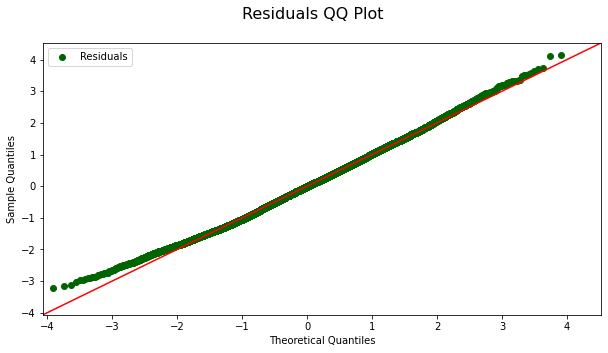

In [121]:
residual = model_log.resid
fig = sm.graphics.qqplot(residual, dist=stats.norm, color="darkgreen", label="Residuals", line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16,)
fig.set_size_inches(10, 5)
plt.legend()
fig.show()

Log Transformation certainly improves the normality assumption.

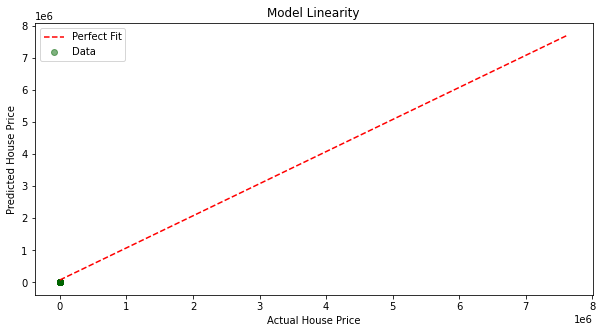

In [135]:
prediction = model_log.predict(data2)
fig, ax = plt.subplots(figsize=(10,5))

perfect_line = np.arange(data2.price.min(), data2.price.max())
ax.plot(perfect_line, linestyle="--", color="red", label="Perfect Fit")
ax.scatter(data2.log_price, prediction, color="darkgreen", label="Data", alpha=0.5)
ax.set_title("Model Linearity")
ax.set_xlabel("Actual House Price")
ax.set_ylabel("Predicted House Price")
ax.legend();

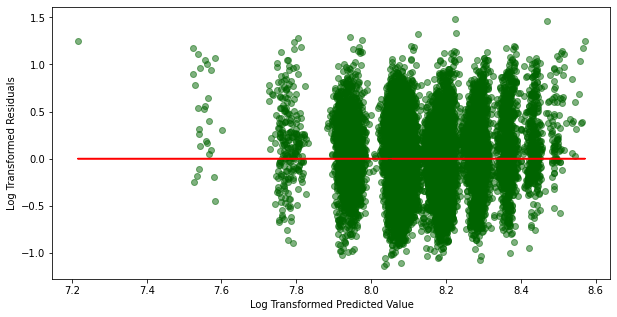

In [130]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(prediction, residual, color="darkgreen", alpha=0.5)
ax.plot(prediction, [0 for length in range(len(data2))], color="red")
ax.set_xlabel("Log Transformed Predicted Value")
ax.set_ylabel("Log Transformed Residuals")
plt.show()

The Model Seems to fulfil homoscedasticity assumption.

In [133]:
xxx = [0 for length in range(len(data2))]
len(xxx)

21597

#Preprocessing of Data
In this Chapter
Our prediction target for this analysis is price. First, separate data into y(target) and x(dependent variables)

In [32]:
y = data["price"]
X = data.drop('price', axis=1)

Next, separate data into train and test using scikit learn

In [33]:
#import scikit learn train_test_split

from sklearn.model_selection import train_test_split

#split data, specifying size of test and train data at 80/20, state random_state for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#display shape of train data
display(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
display(f"y_train is a Series with {y_train.shape[0]} values")

'X_train is a DataFrame with 17277 rows and 20 columns'

'y_train is a Series with 17277 values'

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

modelsc = LinearRegression()
X_train_modelsc = X_train[["sqft_living", "sqft_living15", "grade"]]

modelsc_scores = cross_validate(
    estimator=modelsc,
    X=X_train_modelsc,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", modelsc_scores["train_score"].mean())
print("Validation score:", modelsc_scores["test_score"].mean())
print()

Current Model
Train score:      0.5364418442038327
Validation score: 0.5343638278544229



In [106]:
import numpy as np

bins = np.linspace(data.grade.min(), data.grade.max(), 3)
bins
x= pd.DataFrame(bins)
x1 = pd.cut(data.grade, bins)
x1

0        (3.0, 8.0]
1        (3.0, 8.0]
2        (3.0, 8.0]
3        (3.0, 8.0]
4        (3.0, 8.0]
            ...    
21592    (3.0, 8.0]
21593    (3.0, 8.0]
21594    (3.0, 8.0]
21595    (3.0, 8.0]
21596    (3.0, 8.0]
Name: grade, Length: 21597, dtype: category
Categories (2, interval[float64, right]): [(3.0, 8.0] < (8.0, 13.0]]

TypeError: ignored

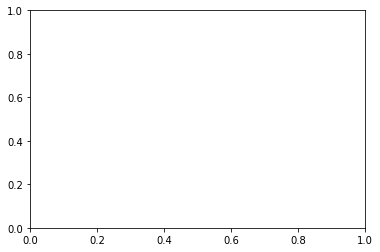

In [107]:
plt.hist(x1)

In [95]:
y=pd.cut(data.grade, 3, retbins=True)
y

(0        (6.333, 9.667]
 1        (6.333, 9.667]
 2         (2.99, 6.333]
 3        (6.333, 9.667]
 4        (6.333, 9.667]
               ...      
 21592    (6.333, 9.667]
 21593    (6.333, 9.667]
 21594    (6.333, 9.667]
 21595    (6.333, 9.667]
 21596    (6.333, 9.667]
 Name: grade, Length: 21597, dtype: category
 Categories (3, interval[float64, right]): [(2.99, 6.333] < (6.333, 9.667] < (9.667, 13.0]],
 array([ 2.99      ,  6.33333333,  9.66666667, 13.        ]))

In [99]:
y1=pd.DataFrame(y)
X= y1.T
X.grade.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: grade, Length: 21597, dtype: bool

TypeError: ignored

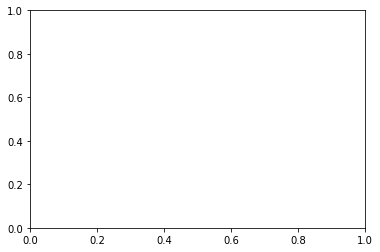

In [103]:
plt.scatter(X.grade, data.price)

In [89]:
bins = pd.IntervalIndex.from_tuples([(3, 5), (6, 9), (9, 13)])
x = pd.cut(data.grade, bins)
x

0        (6.0, 9.0]
1        (6.0, 9.0]
2               NaN
3        (6.0, 9.0]
4        (6.0, 9.0]
            ...    
21592    (6.0, 9.0]
21593    (6.0, 9.0]
21594    (6.0, 9.0]
21595    (6.0, 9.0]
21596    (6.0, 9.0]
Name: grade, Length: 21597, dtype: category
Categories (3, interval[int64, right]): [(3, 5] < (6, 9] < (9, 13]]

In [81]:
x= pd.DataFrame(x)
x.

grade    category
dtype: object

TypeError: ignored

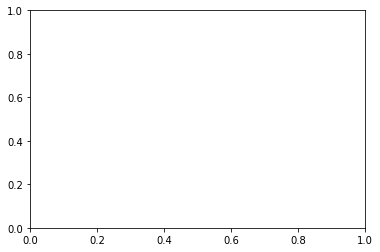

In [85]:
plt.plot(data.price, x.grade)
